<center>
    <h1> INF285 - Computación Científica / Tarea 2 </h1>
    <h2> Camilo Saldías G.</h2>
    <h2> camilo.saldias.12@sansano.usm.cl - 201223512-K </h2>
</center>

_Marzo 2017_

In [80]:
import numpy as np
import bitstring as bs
import matplotlib.pyplot as plt
%matplotlib inline

def to_binary(f):
    b = bs.pack('>d', f)
    b = b.bin
    #show sign + exponent + mantisa
    print(b[0]+' '+b[1:12]+ ' '+b[12:])

<div id='obj' />
# 1. Introducción
A continuación, se presentan los desarrollos de los problemas planteados en la Tarea 2. Cada desarrollo está acompañado con el razonamiento detrás de su creación, en forma de una explicación previa y en comentarios en el código donde corresponda.

<div id='obj' />
# 2. Desarrollo
## 2.1 Aritmética de Punto Flotante
**a)** Defina que corresponde el valor de <b>machine epsilon</b> $\epsilon_{mach}$ y explique porqué es posible obtener dicho valor en una computadora IEEE de doble precisión calculando el valor de la siguiente resta:</p>

$$\left(\frac{7.0}{3.0} - \frac{4.0}{3.0}\right) - 1.0 $$

Implemente la resta usando variables de doble precisión y describa el procedimiento usando aritmética de doble precisión y Nearest Rounding Rule.

El <b>machine epsilon</b> $\epsilon_{mach}$ es la distancia entre 1 y el número más pequeño representable mayor a 1 en una computadora IEEE de doble presición. Para saber por qué esta resta nos permite obtener $\epsilon_{mach}$, debemos analizar la representación binaria de doble presición de cada una de las operaciones que la componen.

In [81]:
to_binary(7.0/3.0)
to_binary(4.0/3.0)

0 10000000000 0010101010101010101010101010101010101010101010101011
0 01111111111 0101010101010101010101010101010101010101010101010101


Las primeras 2 representaciones corresponden a $\frac{7.0}{3.0}$ y $\frac{4.0}{3.0}$, respectivamente. Se puede observar que los bits correspondientes a cada fracción son opuestos, a excepción del primer y último bit de la mantisa, producto del redondeo realizado por el computador. 

In [82]:
to_binary((7.0/3.0 - 4.0/3.0 ))

0 01111111111 0000000000000000000000000000000000000000000000000001


Al restarlos, obtenemos el número más pequeño representable mayor a 1 en una computadora IEEE de doble precisión, donde basta sólo con restarle $1.0$ para obtener el valor buscado, $\epsilon_{mach}$.

In [83]:
to_binary((7.0/3.0 - 4.0/3.0 ) - 1.0)
#Machine Epsilon
print((7.0/3.0 - 4.0/3.0 ) - 1.0)

0 01111001011 0000000000000000000000000000000000000000000000000000
2.220446049250313e-16


**b)** Considere la serie geométrica:

$$\sum_{i=0}^{\infty} r^i = \frac{1}{1-r}$$ 

para $|r|<1$. Ahora considere el siguiente código:

In [84]:
# Suma parcial de serie geométrica.
# Esta función realiza una suma parcial de la serie geométrica con M terminos, 
# pero detecta si es que los terminos que se están agregando aportan o no al
# resultado final. En caso de que los terminos ya no aporten, se detiene el loop
# y se retorna el valor obtenido y el índice en que se detuvo el loop.

def my_partial_geometric_series(r,M):
    sum_final=1.0
    sum_before=sum_final
    final_index=-1
    for i in np.arange(1,M):
        sum_before +=r**i
        if sum_final==sum_before:
            final_index=i-1
            break
        else:
            sum_final=sum_before
    # Se retorna el valor obtenido de la suma parcial y cuando se truncó
    # dado que no aportaba.
    return np.array([sum_final,final_index])

Ahora para distintos valores de $r$ se han obtenido el número de terminos que efectivamente aportan al resultado final dado que se está utilizando _double precision_.

In [85]:
N = 20
M = 1e8
r_all = np.logspace(-1,-20,N)
out_data = np.zeros((N,2))
for i in np.arange(N):
    out_data[i,:]=my_partial_geometric_series(r_all[i],M)

Graficando la candidad de terminos significativos en _double precision_ versus el $r$.

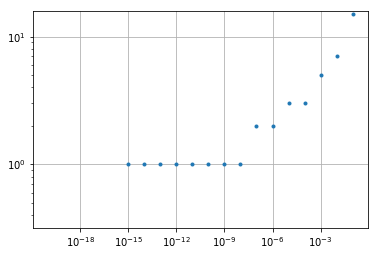

In [86]:
plt.figure()
plt.loglog(r_all,out_data[:,1],'.')
plt.grid(True)
plt.ylim([10**(-0.5),np.max(out_data[:,1])+1])
plt.show()

Explique cláramente por qué a medida que disminuye $r$ disminuye la cantidad de terminos significativos obtenidos.

La cantidad de términos significativos se ve reducida dado que los distintos valores de la función se vuelven similares más rápidamente a medida que disminuye el valor de $r$. Esto cobra más sentido si consideramos la siguiente ecuación:

\begin{equation} |\text{fl}(r)-r| \leq \frac{1}{2} \epsilon_{\text{mach}} |r| \end{equation}

Donde observamos que distancia entre los números en notación de punto flotante es proporcional a la magnitud del número. Por lo tanto, a medida que los valores de $r$ disminuyen, disminuye la distancia entre ellos y, en consecuencia, disminuye la cantidad de términos significativos obtenibles.

**c)** Explique la razón de por qué el loop indicado debe ejecutar el break. Utilice la función "to_binary" incluida en el jupyter notebook "03_floating_point_arithmetic" para entregar su justificación. Obtenga el menor valor de $X$ que ejecuta el break.

Analizando el código indicado, debemos lograr que $X+1.0=X$ para que el `loop` indicado ejecute el `break`. Para lograr esto podemos valernos del redondeo que produce la notación de punto flotante de doble precisión. En este caso, el menor $X$ que cumple la condición es $1.0\cdot{2^{53}}$: el valor de la mantisa excede la capacidad representable en notación de punto flotante de doble precisión, pero sin agregar números adicionales a la misma; por lo mismo, la mantisa queda únicamente con ceros. Añadir $1.0$ a este número implicaría un redondeo en el último bit, que en este caso se traduce en un truncamiento del número, quedando finalmente el mismo resultado.

In [87]:
# Hint: Comenzando con X=1.0 se demorará mucho, piense primero, determine un buen X y luego ejecute el código.
X=2.0**53
a=X+0.0
b=X+1.0
to_binary(a)
to_binary(b)
while(True):
    a+=1.0
    b+=1.0
    if a == b:
        print('They are equal! Why?')
        break

0 10000110100 0000000000000000000000000000000000000000000000000000
0 10000110100 0000000000000000000000000000000000000000000000000000
They are equal! Why?


## 2.2 Pérdida de Significancia
**1-** Dada la función: </p>

$$f(x) = \frac{1 - x}{ 1 + x} - \frac{1}{3x+1}$$

   **a)** Grafique la función usando $x \in {[-10,10]}$ ¿Para que valores de x la función queda reducida a $0$ ?

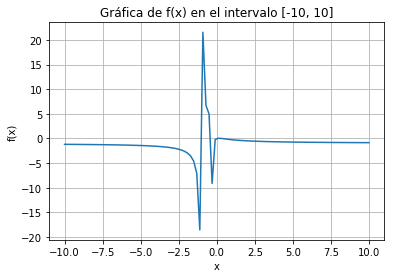

In [88]:
x = np.linspace(-10,10,100)
F = lambda x: (1-x)/(1+x) - 1/(3*x+1)
plt.figure()
plt.plot(x,F(x),'-')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Gráfica de f(x) en el intervalo [-10, 10]")
plt.show()

A simple vista, se puede observar que la función queda reducida a 0 sólo en $x=0$. Esto puede ser incompleto, dado que se grafica para un número acotado de valores.

   **b)** Usando $x = [10^{-1} , 10^{-2} , ... , 10^{-20}] $ , calcule los valores de f(x) ¿Que ocurre con los valores observados? ¿En que momento ocurre pérdida de significancia? Describa el origen de cancelación de digítos. 

In [89]:
#Obtenemos la secuencia de valores para X
x = np.array([10**(-i) for i in range(1,21)])
F = lambda x: (1-x)/(1+x) - 1/(3*x+1)
print(F(x))

[  4.89510490e-02   9.32423339e-03   9.93024921e-04   9.99300250e-05
   9.99930002e-06   9.99993000e-07   9.99999299e-08   9.99999938e-09
   9.99999972e-10   1.00000008e-10   1.00000008e-11   9.99977878e-13
   1.00031095e-13   9.99200722e-15   9.99200722e-16   1.11022302e-16
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]


De los valores entregados, se puede observar que existe pérdida de significancia a partir de $x=10^{-17}$, donde los términos son cancelados en la resta debido a la falta de precisión en la representación de punto flotante, producto de lo pequeños de los valores de $x$.

   **c)** Reescriba la función original para evitar el proceso de pérdida de significancia (hint: busqué un denominador común para ambas fracciones.)
   
   Desarrollando la resta, llegamos a la siguiente expresión:
   
   $$f(x) = \frac{-3x^{2} + x}{3x^{2} + 4x + 1}$$

In [90]:
F2 = lambda x: (-3*x**2 + x)/(3*x**2 + 4*x + 1)

**d)** Analice la diferencia entre los resultados de la función $f(x)$ con la función reescrita en la pregunta anterior. Realice un gráfico que mida la diferencia entre los resultados del punto a) y c). Realice un análisis cualitativo y cuantitativo de los resultados.

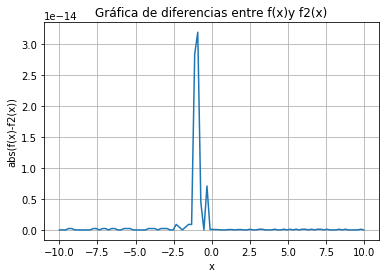

In [91]:
x = np.linspace(-10, 10, 100)
F = lambda x: (1-x)/(1+x) - 1/(3*x+1)
F2 = lambda x: (-3*x**2 + x)/(3*x**2 + 4*x + 1)
f1 = F(x)
f2 = F2(x)
diff = abs(f1 - f2)
plt.figure()
plt.plot(x,diff,'-')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('abs(f(x)-f2(x))')
plt.title("Gráfica de diferencias entre f(x)y f2(x)")
plt.show()

El hecho de que se observen diferencias entre las funciones de los puntos **a)** y **c)** muestra que existe una mejora al reescribir la función para evitar pérdida de significancia. También observamos, a simple vista, que estas diferencias son mayores en los números negativos y en las cercanías del cero (aunque, en general, todas las diferencias son muy pequeñas); esto podría ser causado por posibles indefiniciones de la función.

**2.** Para la siguiente función:

$$g(x) = \frac{1 - \sec(x)}{\tan(x)^2} $$

   **a)** Usando $x = [-2\pi, 2\pi ]$ observe el comportamiento de la función.

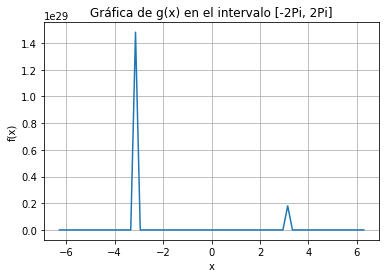

In [92]:
#Obtenemos los valores de x para el gráfico
x = np.arange(-2*np.pi, 2*np.pi+0.01, np.pi/16)
G = lambda x: (1-(1/np.cos(x)))/np.tan(x)**2
plt.figure()
plt.plot(x,G(x),'-')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Gráfica de g(x) en el intervalo [-2Pi, 2Pi]")
plt.show()

A primera vista, sobresalen 2 picos en la función (uno de ellos más intenso que el otro), lo que posiblemente son las asíntotas de la función (lo que no se puede ver con claridad porque el gráfico se realiza con un conjunto acotado de puntos).

**b)** Usando el intervalo $x = [-2\pi, 2\pi ] $ , calcule los valores de f(x) ¿Que ocurre con los valores observados? ¿En que momento ocurre pérdida de significancia? Describa el origen de cancelación de digítos.

In [93]:
x = np.arange(-2*np.pi, 2*np.pi+0.01, np.pi/16)
G = lambda x: (1-(1/np.cos(x)))/np.tan(x)**2
print(G(x))

[  0.00000000e+00  -4.95149722e-01  -4.80216935e-01  -4.53990395e-01
  -4.14213562e-01  -3.57148923e-01  -2.76768654e-01  -1.63243161e-01
   1.96005386e-15   2.42375421e-01   6.19914404e-01   1.25007431e+00
   2.41421356e+00   4.93364801e+00   1.21370712e+01   5.10434345e+01
   1.48072072e+29   5.10434345e+01   1.21370712e+01   4.93364801e+00
   2.41421356e+00   1.25007431e+00   6.19914404e-01   2.42375421e-01
  -5.39030286e-15  -1.63243161e-01  -2.76768654e-01  -3.57148923e-01
  -4.14213562e-01  -4.53990395e-01  -4.80216935e-01  -4.95149722e-01
   0.00000000e+00  -4.95149722e-01  -4.80216935e-01  -4.53990395e-01
  -4.14213562e-01  -3.57148923e-01  -2.76768654e-01  -1.63243161e-01
   8.82055186e-15   2.42375421e-01   6.19914404e-01   1.25007431e+00
   2.41421356e+00   4.93364801e+00   1.21370712e+01   5.10434345e+01
   1.80179407e+28   5.10434345e+01   1.21370712e+01   4.93364801e+00
   2.41421356e+00   1.25007431e+00   6.19914404e-01   2.42375421e-01
  -1.22508009e-14  -1.63243161e-01

De los resultados de evaluar la función, se pueden observar 3 puntos donde existe pérdida de significancia. Más específicamente, estos puntos se encuentran al centro y a los extremos del intervalo evaluado. La razón por las que ocurren estas pérdidas de significancia son similares a las señaladas en el punto anterior (pérdida de significancia por aproximación en punto flotante); sin embargo, las razones por las que ocurren en la función requieren un análisis trigonométrico de la misma, lo que escapa del alcance de este documento.

   **c)** Reescriba la función original para evitar el proceso de pérdida de significancia (hint: implemente propiedades trigonométricas).
   
   Mediante propiedades trigonométricas, llegamos a la siguiente expresión equivalente:
   
   $$g(x) = (\cos(x)-1) \cot(x) \csc(x) $$

In [94]:
G2 = lambda x: (np.cos(x) - 1)*(1/np.tan(x))*(1/np.sin(x))

**d)** Analice la diferencia entre los resultados de la función $g(x)$ con la función reescrita en la pregunta anterior. Realice un gráfico que mida la diferencia entre los resultados del punto a) y c). Realice un análisis cualitativo y cuantitativo de los resultados.

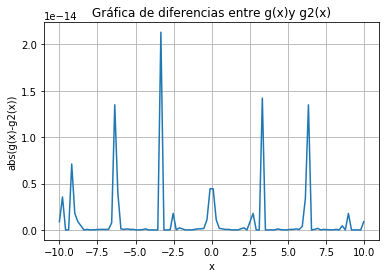

In [95]:
x = np.linspace(-10, 10, 100)
G = lambda x: (1-(1/np.cos(x)))/np.tan(x)**2
G2 = lambda x: (np.cos(x) - 1)*(1/np.tan(x))*(1/np.sin(x))
r1 = G(x)
r2 = G2(x)
diff = abs(r1 - r2)
plt.figure()
plt.plot(x,diff,'-')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('abs(g(x)-g2(x))')
plt.title("Gráfica de diferencias entre g(x)y g2(x)")
plt.show()

Podemos hacer un análisis idéntico al realizado en el punto anterior: el hecho de que se observen diferencias entre las funciones de los puntos **a)** y **c)** muestra que existe una mejora al reescribir la función para evitar pérdida de significancia. Además, observamos algunos picos en el gráfico de distinta magnitud (más que en el punto anterior), lo que podría indicar puntos de indefinición de la función, donde la diferencia entre funciones es considerablemente mayor. A pesar de lo anterior, todas las diferencias son pequeñas, del orden de $10^{-14}$.

<div id='obj' />
# 3. Conclusiones
En esta tarea, logramos un entendimiento mucho más profundo de la pérdida de significancia en los cálculos computacionales, y de los efectos adversos que estos pueden causar en los resultados finales. Se debe tener especial cuidado de evitar las pérdidas de significancia en las funciones utilizadas en los cálculos, ya que esto podría llevar a la aparición de "falsos positivos" dentro de nuestros resultados, lo que podría llevarnos a sacar conclusiones erróneas. Es importante tener en cuenta las limitaciones de las computadoras a la hora de computar los cálculos que deseamos realizar, ya que nos permitirá tener en cuenta esas limitaciones y llevar a cabo acciones para minimizar sus efectos.

<div id='obj' />
# 4. Referencias
* _Markdown_ https://help.github.com/articles/basic-writing-and-formatting-syntax/
* _numpy_ http://www.numpy.org
* _scipy_ https://www.scipy.org/scipylib/index.html
* _sympy_ http://docs.sympy.org/latest/index.html
* _matplotlib_ http://matplotlib.org